<a href="https://colab.research.google.com/github/Rishitha1406/Business-Sales-prediction/blob/main/Business_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import io
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
uploaded=files.upload()

Saving BusinessSales.csv to BusinessSales.csv


**Read the dataset**

In [3]:
Business_Sales=pd.read_csv(io.BytesIO(uploaded['BusinessSales.csv']))

**Analyzing the dataset**

In [4]:
Business_Sales.head()

,division,level of education,training level,work experience,salary,sales
0,peripherals,associate's degree,1,2,66790,193711
1,office supplies,high school,0,4,63143,200167
2,printers,associate's degree,0,6,86480,274258
3,computer software,associate's degree,2,5,103573,358491
4,computer hardware,some college,1,2,72166,216003


In [5]:
Business_Sales.tail()

,division,level of education,training level,work experience,salary,sales
995,computer software,associate's degree,0,3,80539,179264
996,peripherals,associate's degree,2,7,91699,353306
997,computer hardware,associate's degree,0,6,92167,229316
998,office supplies,associate's degree,0,11,98525,385250
999,printers,some college,1,4,74691,265768


In [6]:
Business_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [7]:
Business_Sales.describe()

,training level,work experience,salary,sales
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.229000,6.079000,89862.131000,334793.255000
std,0.949453,2.913975,17672.253037,109864.104536
min,0.000000,0.000000,41539.000000,52114.000000
25%,0.000000,4.000000,77426.750000,256881.000000
50%,1.000000,6.000000,89070.000000,331629.500000
75%,2.000000,8.000000,101766.750000,408458.500000
max,3.000000,16.000000,158306.000000,772906.000000


In [8]:
Business_Sales.corr()

,training level,work experience,salary,sales
training level,1.000000,0.019866,0.325558,0.523738
work experience,0.019866,1.000000,0.855077,0.819134
salary,0.325558,0.855077,1.000000,0.904241
sales,0.523738,0.819134,0.904241,1.000000


In [9]:
Business_Sales.isnull().sum()

division              0
level of education    0
training level        0
work experience       0
salary                0
sales                 0
dtype: int64

In [10]:
Business_Sales.shape

(1000, 6)

In [11]:
Business_Sales.nunique

<bound method DataFrame.nunique of               division  level of education  training level  work experience  \
0          peripherals  associate's degree               1                2   
1      office supplies         high school               0                4   
2             printers  associate's degree               0                6   
3    computer software  associate's degree               2                5   
4    computer hardware        some college               1                2   
..                 ...                 ...             ...              ...   
995  computer software  associate's degree               0                3   
996        peripherals  associate's degree               2                7   
997  computer hardware  associate's degree               0                6   
998    office supplies  associate's degree               0               11   
999           printers        some college               1                4   

     salary   sa

In [12]:
Business_Sales.columns

Index(['division', 'level of education', 'training level', 'work experience',
       'salary', 'sales'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(Business_Sales['division'])

In [14]:
Business_Sales.drop("division", axis=1, inplace=True)
Business_Sales["division"] = label
Business_Sales.head()

,level of education,training level,work experience,salary,sales,division
0,associate's degree,1,2,66790,193711,3
1,high school,0,4,63143,200167,2
2,associate's degree,0,6,86480,274258,4
3,associate's degree,2,5,103573,358491,1
4,some college,1,2,72166,216003,0


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(Business_Sales['level of education'])

In [16]:
Business_Sales.drop("level of education", axis=1, inplace=True)
Business_Sales["level of education"] = label
Business_Sales.head()

,training level,work experience,salary,sales,division,level of education
0,1,2,66790,193711,3,0
1,0,4,63143,200167,2,2
2,0,6,86480,274258,4,0
3,2,5,103573,358491,1,0
4,1,2,72166,216003,0,4


In [17]:
Business_Sales.head()

,training level,work experience,salary,sales,division,level of education
0,1,2,66790,193711,3,0
1,0,4,63143,200167,2,2
2,0,6,86480,274258,4,0
3,2,5,103573,358491,1,0
4,1,2,72166,216003,0,4


In [18]:
Business_Sales['sales'] = Business_Sales['sales']//100000

In [19]:
Business_Sales.head()

,training level,work experience,salary,sales,division,level of education
0,1,2,66790,1,3,0
1,0,4,63143,2,2,2
2,0,6,86480,2,4,0
3,2,5,103573,3,1,0
4,1,2,72166,2,0,4


In [20]:
Business_Sales.columns

Index(['training level', 'work experience', 'salary', 'sales', 'division',
       'level of education'],
      dtype='object')

**Split the dataset into dependent and independent**

In [21]:
x=Business_Sales[['training level', 'work experience', 'division','level of education']]
y=Business_Sales['sales']

In [22]:
x

,training level,work experience,division,level of education
0,1,2,3,0
1,0,4,2,2
2,0,6,4,0
3,2,5,1,0
4,1,2,0,4
...,...,...,...,...
995,0,3,1,0
996,2,7,3,0
997,0,6,0,0
998,0,11,2,0


In [23]:
y

0      1
1      2
2      2
3      3
4      2
      ..
995    1
996    3
997    2
998    3
999    2
Name: sales, Length: 1000, dtype: int64

In [24]:
x.shape,y.shape

((1000, 4), (1000,))

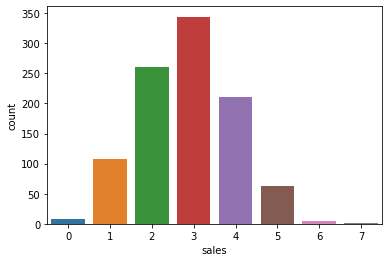

In [25]:
sns.countplot(y)

**Splitting into training and testing data**

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

**SUPPORT VECTOR MACHINE**

In [27]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(x_train,y_train)
y_pred_svm=svm_classifier.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score_svm=accuracy_score(y_pred_svm,y_test)
print('Accuracy score of the provided data using Support Vector Machine Algorithm is : ',accuracy_score_svm)

Accuracy score of the provided data using Support Vector Machine Algorithm is :  0.78


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix_svm=confusion_matrix(y_test,y_pred_svm)
print(confusion_matrix_svm)

[[17  8  0  0  0]
 [ 4 39  6  0  0]
 [ 0 10 57  5  0]
 [ 0  0  8 37  0]
 [ 0  0  0  3  6]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           1       0.81      0.68      0.74        25
           2       0.68      0.80      0.74        49
           3       0.80      0.79      0.80        72
           4       0.82      0.82      0.82        45
           5       1.00      0.67      0.80         9

    accuracy                           0.78       200
   macro avg       0.82      0.75      0.78       200
weighted avg       0.79      0.78      0.78       200



Text(42.0, 0.5, 'Truth')

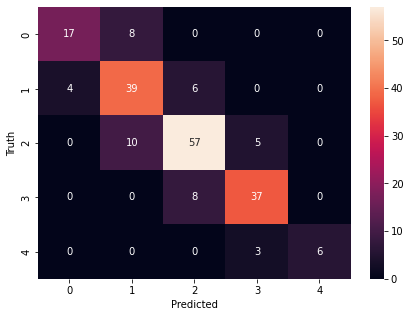

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_svm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**LOGISTIC REGRESSION**

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [33]:
accuracy_score_lr=accuracy_score(y_pred_lr,y_test)
print('Accuracy score of the provided data using Logistic Regression Algorithm is : ',accuracy_score_lr)

Accuracy score of the provided data using Logistic Regression Algorithm is :  0.77


In [34]:
confusion_matrix_lr=confusion_matrix(y_test,y_pred_svm)
print(confusion_matrix_lr)

[[17  8  0  0  0]
 [ 4 39  6  0  0]
 [ 0 10 57  5  0]
 [ 0  0  8 37  0]
 [ 0  0  0  3  6]]


In [35]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           1       0.77      0.68      0.72        25
           2       0.68      0.80      0.74        49
           3       0.78      0.83      0.81        72
           4       0.85      0.73      0.79        45
           5       1.00      0.56      0.71         9

    accuracy                           0.77       200
   macro avg       0.82      0.72      0.75       200
weighted avg       0.78      0.77      0.77       200



Text(42.0, 0.5, 'Truth')

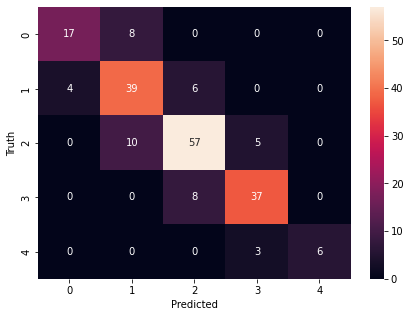

In [36]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_lr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**NAIVE BAYES**

In [37]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)

In [38]:
accuracy_score_nb=accuracy_score(y_pred_nb,y_test)
print('Accuracy score of the provided data using Naive Bayes Algorithm is : ',accuracy_score_nb)

Accuracy score of the provided data using Naive Bayes Algorithm is :  0.645


In [39]:
confusion_matrix_nb=confusion_matrix(y_test,y_pred_nb)
print(confusion_matrix_nb)

[[ 0  0  0  0  0  0]
 [ 6 10  9  0  0  0]
 [ 0  3 32 14  0  0]
 [ 0  0 10 58  4  0]
 [ 0  0  1 18 26  0]
 [ 0  0  0  0  6  3]]


In [40]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.77      0.40      0.53        25
           2       0.62      0.65      0.63        49
           3       0.64      0.81      0.72        72
           4       0.72      0.58      0.64        45
           5       1.00      0.33      0.50         9

    accuracy                           0.65       200
   macro avg       0.63      0.46      0.50       200
weighted avg       0.69      0.65      0.65       200



Text(42.0, 0.5, 'Truth')

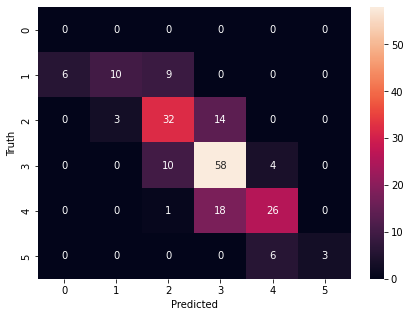

In [41]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_nb,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**K NEAREST NEIGHBOURS**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [43]:
accuracy_score_knn=accuracy_score(y_pred_knn,y_test)
print('Accuracy score of the provided data using K Nearest Neighbours Algorithm is : ',accuracy_score_knn)

Accuracy score of the provided data using K Nearest Neighbours Algorithm is :  0.63


In [44]:
confusion_matrix_knn=confusion_matrix(y_test,y_pred_knn)
print(confusion_matrix_knn)

[[ 0  0  0  0  0  0]
 [ 2 15  8  0  0  0]
 [ 0  9 32  8  0  0]
 [ 0  0 13 50  9  0]
 [ 0  0  0 17 27  1]
 [ 0  0  0  0  7  2]]


In [45]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.62      0.60      0.61        25
           2       0.60      0.65      0.63        49
           3       0.67      0.69      0.68        72
           4       0.63      0.60      0.61        45
           5       0.67      0.22      0.33         9

    accuracy                           0.63       200
   macro avg       0.53      0.46      0.48       200
weighted avg       0.64      0.63      0.63       200



Text(42.0, 0.5, 'Truth')

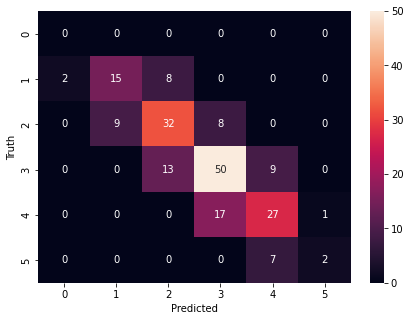

In [46]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_knn,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Random Forest Classifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)

In [48]:
accuracy_score_rfc=accuracy_score(y_pred_rfc,y_test)
print('Accuracy score of the provided data using Random Forest Classifier Algorithm is : ',accuracy_score_rfc)

Accuracy score of the provided data using Random Forest Classifier Algorithm is :  0.74


In [49]:
confusion_matrix_rfc=confusion_matrix(y_test,y_pred_rfc)
print(confusion_matrix_rfc)

[[19  6  0  0  0]
 [10 32  7  0  0]
 [ 0  7 56  9  0]
 [ 0  0 10 34  1]
 [ 0  0  0  2  7]]


In [50]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           1       0.66      0.76      0.70        25
           2       0.71      0.65      0.68        49
           3       0.77      0.78      0.77        72
           4       0.76      0.76      0.76        45
           5       0.88      0.78      0.82         9

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.74      0.74      0.74       200



Text(51.0, 0.5, 'Truth')

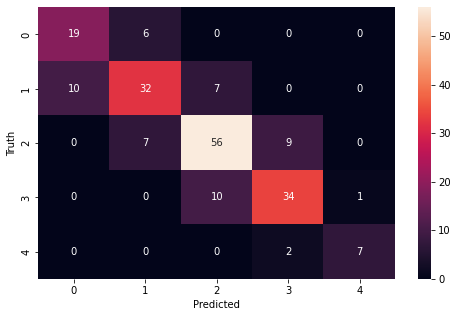

In [51]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_rfc,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
algorithms=['Support Vector Machine','Logistic Regression','Naive Bayes','K-Nearest Neighbors','Random Forest Classifier']
scores=[accuracy_score_svm,accuracy_score_lr,accuracy_score_nb,accuracy_score_knn,accuracy_score_rfc]

In [53]:
n=len(algorithms)
for i in range(n):
  print('Accuracy score using '+algorithms[i]+' is : '+str(round(scores[i]*100))+'%')

Accuracy score using Support Vector Machine is : 78%
Accuracy score using Logistic Regression is : 77%
Accuracy score using Naive Bayes is : 64%
Accuracy score using K-Nearest Neighbors is : 63%
Accuracy score using Random Forest Classifier is : 74%


In [54]:
for i in range(n):
  scores[i]=round(scores[i]*100)
print(scores)

[78, 77, 64, 63, 74]
